# Which Test Should Stusents take? ACT or SAT? That is a question

## Background: <br>
Accordind to a 2015 reserch done by Hanover Research , (https://www.hartlandschools.us/documents/curriculum/PLAN-PSAT-ACT-SAT%20Assessment%20Correlations%20-%20Washtenaw%20ISD%202015.pdf) ,
"even with small sample sizes, ACT performance is strongly predictive of SAT performance,
and this relationship is statistically significant at the 99 percent level". <br>

Based on this reserch, we assume that both ACT and SAT score can equivalently reflect a student's acadimic capability. In other words, student who scores high on SAT tends to score high in ACT as well and we assume students who take ACT and SAT are in same level, i.e it's not that bad students prefer ACT and good student preper SAT etc.)

## Problem statement
I work for a school district that has asked me to advise their high school students on what SAT or ACT score they should be aiming for based on their intended area of study or school preferences. Due to tightness of timeline, students can not take both exams. So they have to make the correct choice.

## Data processing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as stats 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence as olsi
from sklearn.linear_model import LinearRegression
from sklearn import metrics

https://www.analyze-ed.com/average-act-score.html

In [2]:
df1 = pd.read_csv('SAT.csv')
act = pd.read_csv('ACT.csv',sep='\t').iloc[:-1]
acceptance = pd.read_csv('sat_act_by_college.txt')

In [3]:
def insert(df,i,j,df_add):
    df1 = df.iloc[:i,:]
    df2 = df.iloc[j:,:]
    df_new = pd.concat([df1,df_add,df2],ignore_index=True)
    return df_new

In [4]:
d = {"Degree-level goal and intended college major": "Sciences: Biological & Physical", \
     'Total SAT':df1.iloc[12:16,1:].mean()}
df_add = pd.DataFrame(data=d)

sat = insert(df1,12,16,df_add)

major =  pd.concat([sat,act[['Avg ACT Composite Score']]] , axis = 1) 

In [5]:
major

,Degree-level goal and intended college major,Total SAT,Avg ACT Composite Score
0,Agriculture,968.00,20
1,Architecture,1042.00,21
2,Arts: Visual & Performing,1047.00,21
3,Business,1066.00,22
4,Communication and journalism,1066.00,22
5,"Community, Family, & Personal Services",952.00,18
6,Computer and intormation sciences,1156.00,25
7,Edcation,1021.00,20
8,Engineering,1140.00,24
9,English & Foreign Languages,1108.50,24


In [6]:
acceptance['SAT Total 25th-75th Percentile']=acceptance['SAT Total 25th-75th Percentile'].map(lambda value: value.rsplit('-'))

In [7]:
acceptance['ACT Total 25th-75th Percentile']=acceptance['ACT Total 25th-75th Percentile'].map(lambda value: value.rsplit('-'))

In [8]:
 
acceptance['SAT Total 25th Percentile'] = acceptance['SAT Total 25th-75th Percentile'].apply(lambda x: x[0])
acceptance['SAT Total 75th Percentile'] = acceptance['SAT Total 25th-75th Percentile'].apply(lambda x: x[1])
acceptance['ACT Total 25th Percentile'] = acceptance['ACT Total 25th-75th Percentile'].apply(lambda x: x[0])
acceptance['ACT Total 75th Percentile'] = acceptance['ACT Total 25th-75th Percentile'].apply(lambda x: x[1])

In [9]:
acceptance['SAT Total 25th Percentile'] = pd.to_numeric(acceptance['SAT Total 25th Percentile'],errors='coerce')
acceptance['SAT Total 75th Percentile'] = pd.to_numeric(acceptance['SAT Total 75th Percentile'],errors='coerce')
acceptance['ACT Total 25th Percentile'] = pd.to_numeric(acceptance['ACT Total 25th Percentile'],errors='coerce')
acceptance['ACT Total 75th Percentile'] = pd.to_numeric(acceptance['ACT Total 75th Percentile'],errors='coerce')
# acceptance

In [10]:
acceptance['SAT Total 25th Percentile'].isnull().sum()

10

In [11]:
acceptance['ACT Total 25th Percentile'].isnull().sum()

6

In [12]:
acceptance['SAT Total 75th Percentile'].isnull().sum()

6

In [13]:
acceptance['ACT Total 75th Percentile'].isnull().sum()

6

In [14]:
accept = acceptance[['School','SAT Total 25th Percentile','SAT Total 75th Percentile','ACT Total 25th Percentile','ACT Total 75th Percentile']]
accept.dropna(inplace=True)
accept = accept.reset_index(drop=True)
accept

/var/folders/l6/sgjk4nkn1l77fkj9zjw0cgcm0000gn/T/ipykernel_97421/26091030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accept.dropna(inplace=True)


,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile
0,Stanford University,1440.0,1570.0,32.0,35.0
1,Harvard College,1460.0,1580.0,33.0,35.0
2,Princeton University,1440.0,1570.0,32.0,35.0
3,Columbia University,1450.0,1560.0,33.0,35.0
4,Yale University,1460.0,1570.0,33.0,35.0
...,...,...,...,...,...
396,University of Texas Rio Grande Valley,950.0,1130.0,17.0,22.0
397,University of South Dakota,990.0,1180.0,19.0,25.0
398,University of Mississippi,1050.0,1270.0,21.0,29.0
399,University of Wyoming,1060.0,1280.0,22.0,28.0


# Part 1: ACT vs SAT scores group by students' intended schools 


## EDA

Text(0, 0.5, 'ACT Scores')

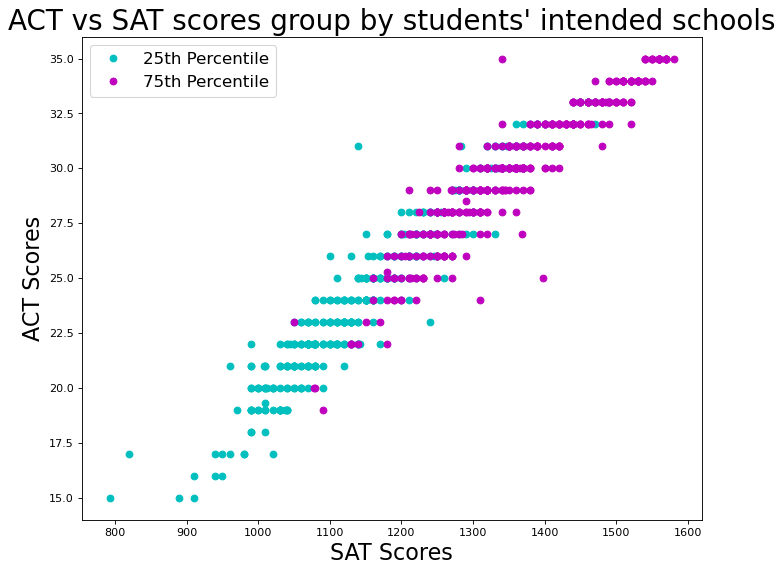

In [15]:
u=accept['SAT Total 25th Percentile']
v=accept['ACT Total 25th Percentile']
m=accept['SAT Total 75th Percentile']
n=accept['ACT Total 75th Percentile']

plt.figure(figsize=(10, 8), dpi=80)

plt.plot(u,v,'co', label="25th Percentile")
plt.plot(m,n,'mo', label="75th Percentile")
 
plt.title("ACT vs SAT scores group by students' intended schools",fontsize= 25)
plt.legend(loc="upper left", fontsize= 15)

plt.xlabel("SAT Scores",fontsize= 20)
plt.ylabel("ACT Scores",fontsize= 20)
# add bar plot

In [16]:
u.corr(v)

0.961835435084276

In [17]:
m.corr(n)

0.9413199682512434

## Findings:
We can see that the 25th Percentile has a higher correlation between SAT and ACT Score than the 75th Percentile. ( r > 0.96 which suggest a strong linear realtionship between the 25th Percentile SAT and ACT score) <br>
For students who apply to a college, the 25 th percentile score is more important for reference than 75th percentile.

In next section, I try to use linear regression to fit in  model for 25th Percentile and then find outliers which deviate significantly from the expected value ( in other words, for a given 25th Percentile SAT score of a college, if the actual college acceptance 25th Percentile  ACT score is much lower than expected value, then students who want to apply for this college should ACT. otherwise, if actual ACT score is higher than expected, students should take SAT instead)

## Fitting Linear Model & Visialization

In [18]:
U = accept[['SAT Total 25th Percentile']]
lr = LinearRegression()
lr.fit(U, v)
coef=lr.coef_
incpt=lr.intercept_

Text(0, 0.5, 'ACT Total 25th Percentile')

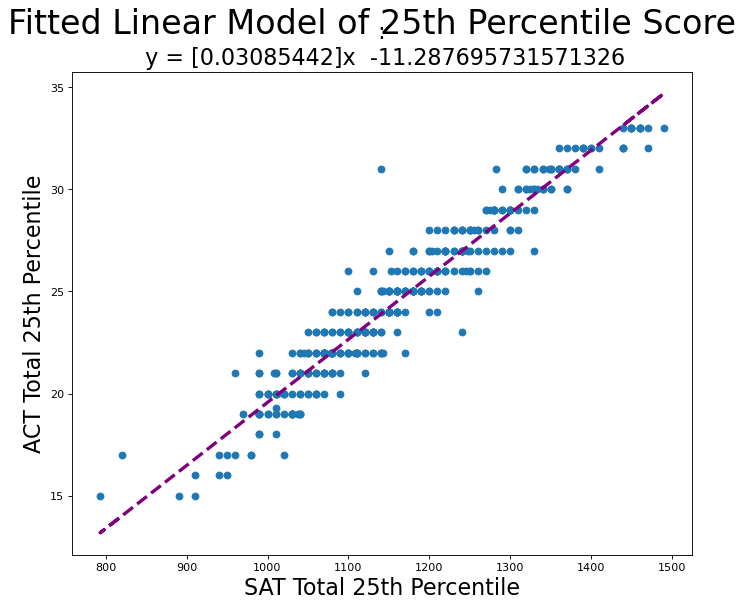

In [19]:
v_preds = lr.predict(U)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(U, v) 
plt.suptitle('Fitted Linear Model of 25th Percentile Score', fontsize=30)
plt.title(f' : \n y = {coef}x  {incpt}',fontsize= 20)
plt.plot(u, v_preds, '--', color='purple',linewidth=3)
plt.xlabel("SAT Total 25th Percentile" ,fontsize= 20)
plt.ylabel("ACT Total 25th Percentile", fontsize= 20)

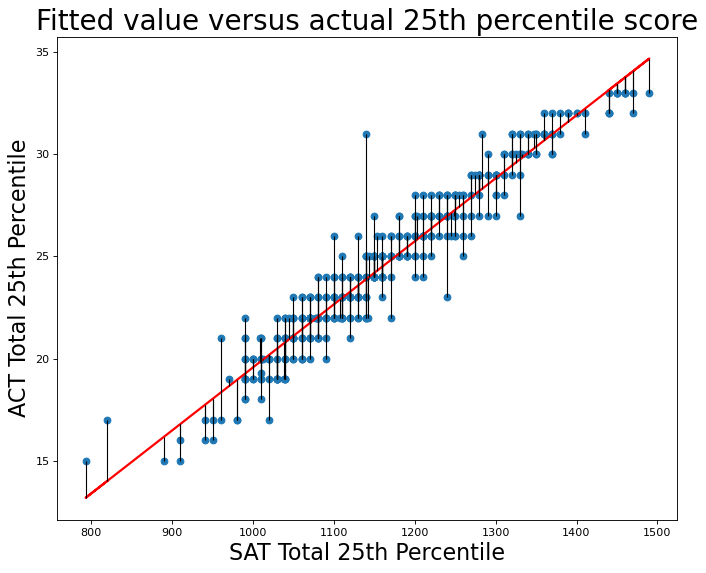

In [20]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=80)

ax.plot(u,v_preds,color='red',linewidth=2)
ax.scatter(u,v)

ax.vlines(u,v,v_preds,color='black',linewidth=1)

plt.title("Fitted value versus actual 25th percentile score" ,fontsize= 25)
plt.xlabel("SAT Total 25th Percentile" ,fontsize= 20)
plt.ylabel("ACT Total 25th Percentile", fontsize= 20)

plt.show()

Text(0, 0.5, 'Residuals')

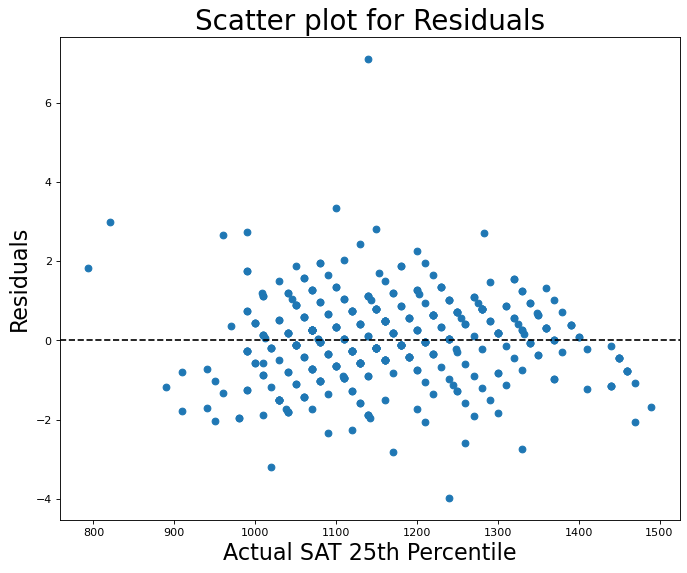

In [21]:
resids = v-v_preds
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(u, resids)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Scatter plot for Residuals" ,fontsize= 25)
plt.xlabel('Actual SAT 25th Percentile', fontsize= 20)
plt.ylabel('Residuals', fontsize= 20) 

Text(0, 0.5, 'Count of data points')

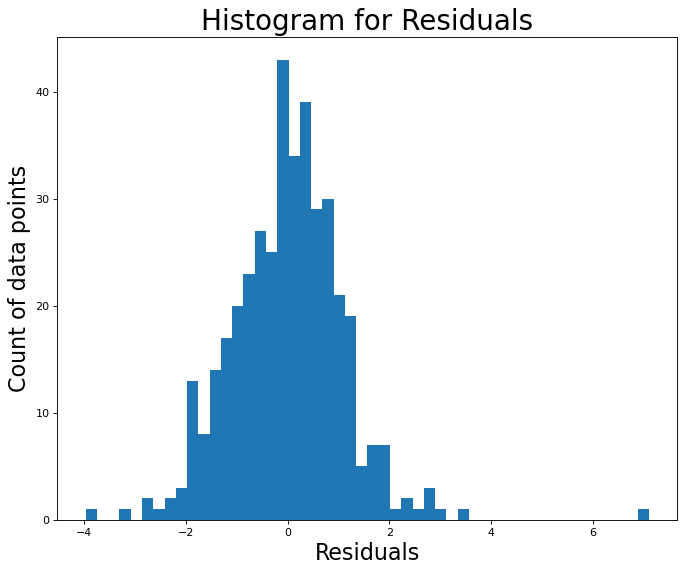

In [22]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist (resids, bins=50)
plt.title("Histogram for Residuals" ,fontsize= 25)
plt.xlabel('Residuals', fontsize= 20)
plt.ylabel('Count of data points', fontsize= 20) 

In [24]:
U = sm.add_constant(u)
l = sm.OLS(v, U)
lm = l.fit() 
print(lm.summary())

                                OLS Regression Results                               
Dep. Variable:     ACT Total 25th Percentile   R-squared:                       0.925
Model:                                   OLS   Adj. R-squared:                  0.925
Method:                        Least Squares   F-statistic:                     4930.
Date:                       Wed, 28 Sep 2022   Prob (F-statistic):          1.11e-226
Time:                               00:55:18   Log-Likelihood:                -610.33
No. Observations:                        401   AIC:                             1225.
Df Residuals:                            399   BIC:                             1233.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

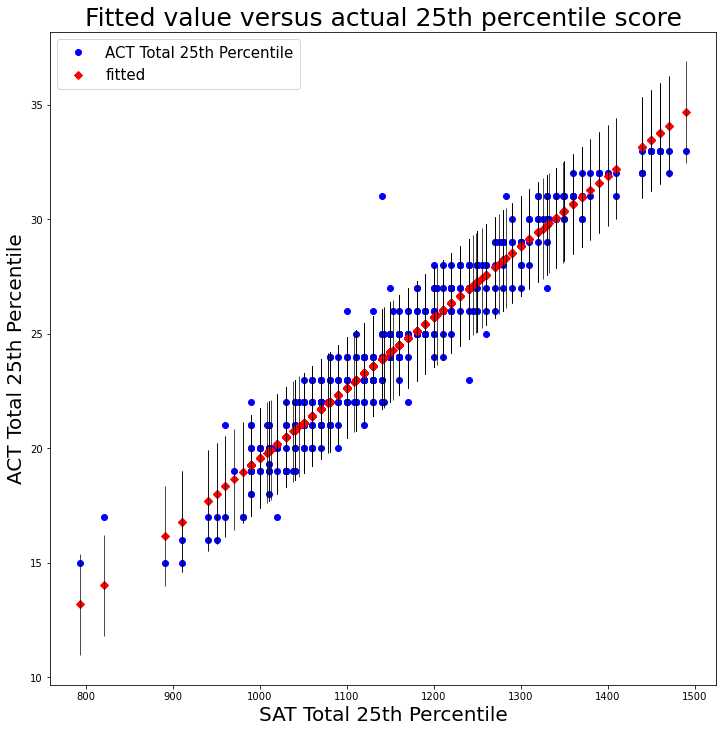

In [59]:
fig = sm.graphics.plot_fit(lm,1)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout(pad=1.0)

plt.title("Fitted value versus actual 25th percentile score" ,fontsize= 25)
plt.xlabel("SAT Total 25th Percentile" ,fontsize= 20)
plt.ylabel("ACT Total 25th Percentile", fontsize= 20)
plt.legend(loc="upper left", fontsize= 15)
plt.show()

## Standardized residuals
Standardized residuals (sometimes referred to as "internally studentized residuals") are defined for each observation, i = 1, ..., n as an ordinary residual divided by an estimate of its standard deviation:

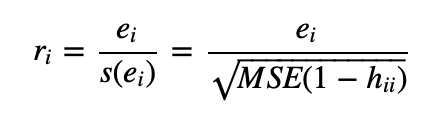

The standardized residual is the residual divided by its standard deviation for simple linear regression

In [26]:
# Producing studenterized residual from statsmodels.api
stud_res = lm.outlier_test()
df_stud_res= pd.DataFrame(stud_res, columns = ['student_resid','unadj_p','bonf(p)'])
df_stud_res

,student_resid,unadj_p,bonf(p)
0,-1.035714,0.300964,1.0
1,-0.688752,0.491381,1.0
2,-1.035714,0.300964,1.0
3,-0.408699,0.682981,1.0
4,-0.688752,0.491381,1.0
...,...,...,...
396,-0.925728,0.355148,1.0
397,-0.232883,0.815972,1.0
398,-0.098583,0.921519,1.0
399,0.524314,0.600352,1.0


Text(0, 0.5, 'Studentized Residuals')

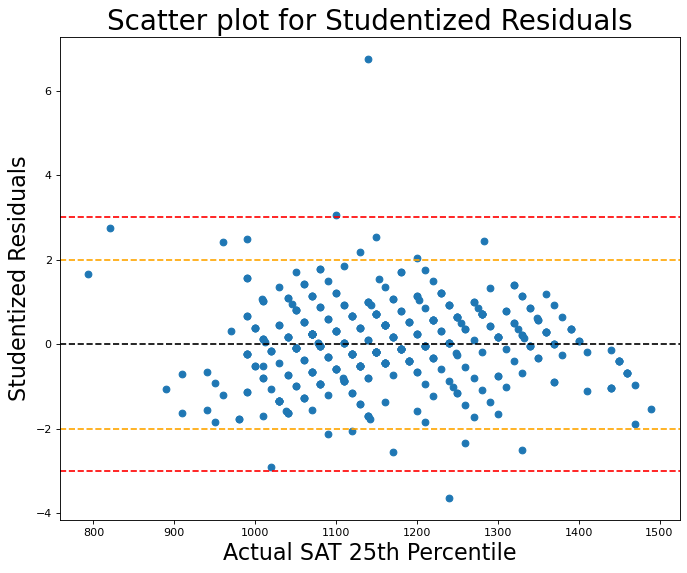

In [27]:
student_resid = df_stud_res.iloc[:,0]

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(u, student_resid)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='orange', linestyle='--')
plt.axhline(y=-2, color='orange', linestyle='--')
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')

plt.title("Scatter plot for Studentized Residuals" ,fontsize= 25)
plt.xlabel('Actual SAT 25th Percentile', fontsize= 20)
plt.ylabel('Studentized Residuals', fontsize= 20) 

Text(0, 0.5, 'Count of data points')

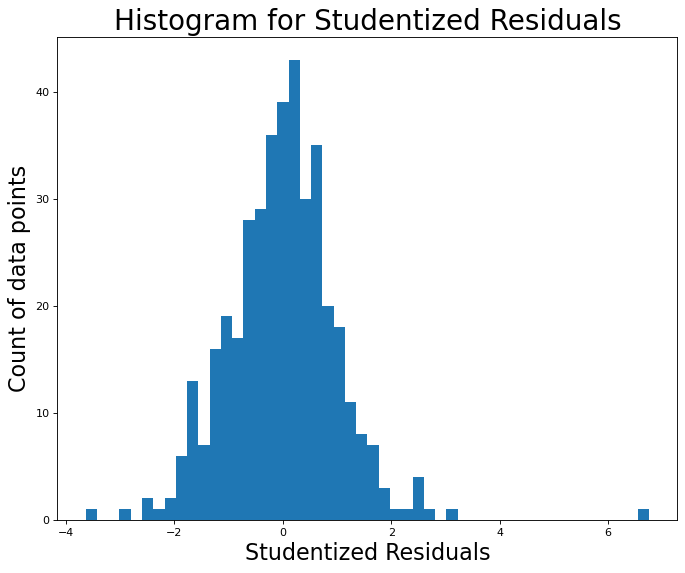

In [28]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(student_resid, bins=50)
plt.title("Histogram for Studentized Residuals" ,fontsize= 25)
plt.xlabel('Studentized Residuals', fontsize= 20)
plt.ylabel('Count of data points', fontsize= 20) 

In [29]:
accept = pd.concat([accept, student_resid], axis=1)
#accept

In [30]:
accept.sort_values('student_resid',ascending=True)

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
388,Florida International,1240.0,1300.0,23.0,28.0,-3.634186
340,University of Alaska Anchorage,1020.0,1220.0,17.0,24.0,-2.899617
216,University of North Carolina—​Wilmington,1170.0,1320.0,22.0,27.0,-2.550783
139,University of Wisconsin—​Madison,1330.0,1450.0,27.0,32.0,-2.497894
64,University of California—​Santa Barbara,1260.0,1460.0,25.0,33.0,-2.347173
...,...,...,...,...,...,...
342,College of St. Benedict,990.0,1210.0,22.0,27.0,2.492194
280,Wheaton College (MA),1150.0,1340.0,27.0,32.0,2.544489
400,University of Texas El Paso,820.0,1050.0,17.0,23.0,2.738551
93,Pratt Institute,1100.0,1320.0,26.0,30.0,3.048294


## Find Outliers

An observation with a standardized residual that is larger than 3 (in absolute value) is deemed by some to be an outlier. <br>
Some statistical software flags any observation with a standardized residual that is larger than 2 (in absolute value). <br>
(reference: https://online.stat.psu.edu/stat462/node/172/)

In [31]:
# Outliers

otl_higherACT = accept.loc[accept['student_resid']>3, :]
otl_lowerACT = accept.loc[accept['student_resid']< -3, :]
otl_higherACT

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
93,Pratt Institute,1100.0,1320.0,26.0,30.0,3.048294
304,Willamette University,1140.0,1340.0,31.0,35.0,6.758407


In [56]:
otl_lowerACT

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
388,Florida International,1240.0,1300.0,23.0,28.0,-3.634186


## Result

Here we set the benchmark of standardized residual: absolute value > 2

In [32]:
Sch_prefer_ACT = accept.loc[accept['student_resid'] < -2, :].sort_values('student_resid',ascending=True)
Sch_prefer_SAT = accept.loc[accept['student_resid'] > 2, :].sort_values('student_resid',ascending=False)

### List of schools prefer ACT
Below list is of school with lower ACT 25th Percentile score than SAT 25th Percentile score. 
In orther words, these schools prefer ACT. 

In [33]:
Sch_prefer_ACT 

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
388,Florida International,1240.0,1300.0,23.0,28.0,-3.634186
340,University of Alaska Anchorage,1020.0,1220.0,17.0,24.0,-2.899617
216,University of North Carolina—​Wilmington,1170.0,1320.0,22.0,27.0,-2.550783
139,University of Wisconsin—​Madison,1330.0,1450.0,27.0,32.0,-2.497894
64,University of California—​Santa Barbara,1260.0,1460.0,25.0,33.0,-2.347173
368,Washington College,1090.0,1300.0,20.0,29.0,-2.121580
349,University of Arizona,1120.0,1350.0,21.0,29.0,-2.052951


### List of schools prefer SAT
Below list is of school with higher ACT 25th Percentile score than SAT 25th Percentile score. 
In orther words, these schools prefer SAT. Among the list, the Willamette University has student_resid>3, which indicates that it does not really fit in our modle. Thus I strongly encourage who want to apply Willamette University take SAT rather than ACT

In [34]:
Sch_prefer_SAT

,School,SAT Total 25th Percentile,SAT Total 75th Percentile,ACT Total 25th Percentile,ACT Total 75th Percentile,student_resid
304,Willamette University,1140.0,1340.0,31.0,35.0,6.758407
93,Pratt Institute,1100.0,1320.0,26.0,30.0,3.048294
400,University of Texas El Paso,820.0,1050.0,17.0,23.0,2.738551
280,Wheaton College (MA),1150.0,1340.0,27.0,32.0,2.544489
342,College of St. Benedict,990.0,1210.0,22.0,27.0,2.492194
35,The Cooper Union,1283.0,1510.0,31.0,34.0,2.451723
323,Boise State,960.0,1180.0,21.0,26.0,2.425793
293,Centre College,1130.0,1380.0,26.0,32.0,2.192794
174,Clark University,1200.0,1390.0,28.0,31.0,2.046549


In [35]:
Sch_prefer_ACT['School']

388                       Florida International
340              University of Alaska Anchorage
216    University of North Carolina—​Wilmington
139            University of Wisconsin—​Madison
64      University of California—​Santa Barbara
368                          Washington College
349                       University of Arizona
Name: School, dtype: object

In [36]:
# This Function is to attach labels to each points in scatter plot
# In order to ajust text label to avoid overlapping
# Uncomment below part to download and use adjustText package (credit to https://github.com/Phlya/adjustText)

# !pip install adjustText
from adjustText import adjust_text

def annotate(x,y,annotation):
    texts = []
    for xs, ys, s in zip(x, y, annotation):
        texts.append(plt.text(xs, ys, s))
        adjust_text(texts, only_move={'points':'y', 'texts':'y'})
    

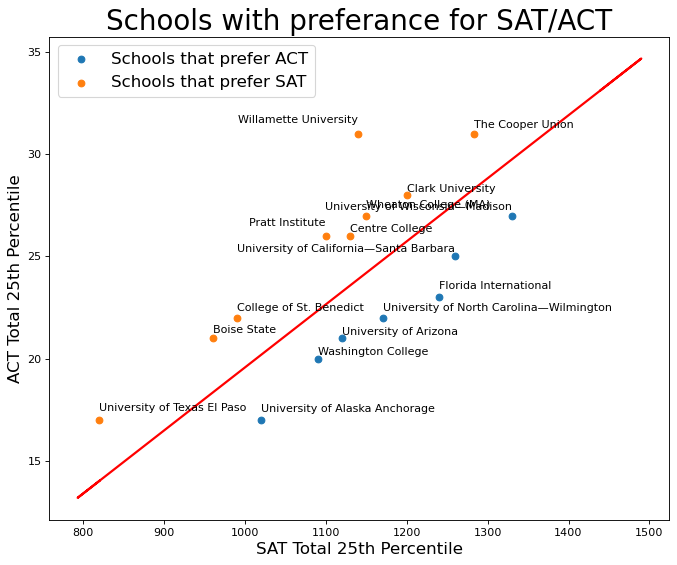

In [37]:
# Visialize Results

u1,v1= Sch_prefer_ACT['SAT Total 25th Percentile'], Sch_prefer_ACT['ACT Total 25th Percentile']
u2,v2= Sch_prefer_SAT['SAT Total 25th Percentile'], Sch_prefer_SAT['ACT Total 25th Percentile']

fig, ax = plt.subplots(figsize=(10, 8),dpi=80)

ax.plot(u,v_preds,color='red',linewidth=2)
ax.scatter(u1,v1,label='Schools that prefer ACT')
ax.scatter(u2,v2,label='Schools that prefer SAT')

# labels (intended school) for each point
annotations1= Sch_prefer_ACT['School']
annotations2= Sch_prefer_SAT['School']

annotate(u1, v1, annotations1)
annotate(u2, v2, annotations2)

plt.ylabel("ACT Total 25th Percentile", fontsize = 15)
plt.xlabel("SAT Total 25th Percentile", fontsize = 15)
plt.legend(loc="upper left", fontsize= 15)
plt.title("Schools with preferance for SAT/ACT" ,fontsize= 25)
plt.show()

# Part 2 ACT vs SAT Scores Group By Students' Intended Majors

## EDA

In [38]:
x = sat['Total SAT']
y = act['Avg ACT Composite Score']

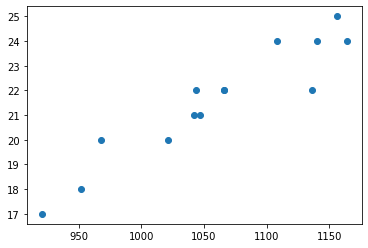

In [39]:
plt.plot(x,y,'o')

In [40]:
x.corr(y)

#>0.5 : strong linear relation

0.9419327522416332

# Fitting Linear Model & Visialization

Average SAT (x) vs ACT score (y) based on tast takers' intended majors

In [41]:
def objective(x, a, b):
    return a * x + b

In [42]:
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt

print(f'fitted linear model is : y = {a:.5f}x  {b:.5f}')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

fitted linear model is : y = 0.02840x  -8.51634


In [43]:
X = major[['Total SAT']]
y = major['Avg ACT Composite Score']
l = LinearRegression()
l.fit(X, y)
coef=l.coef_
incpt=l.intercept_
coef

array([0.02840048])

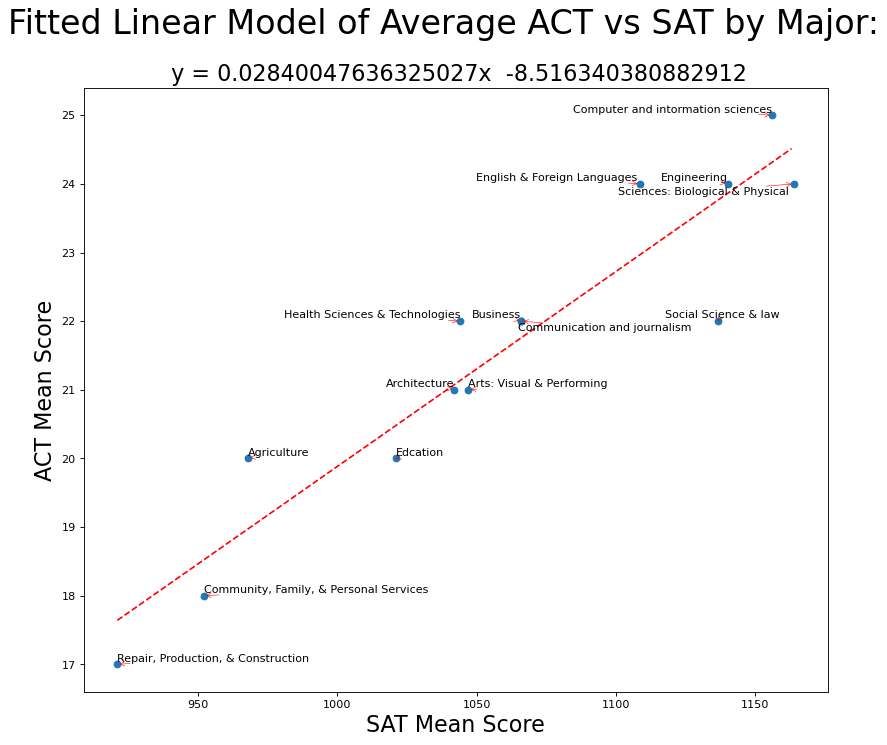

In [44]:
from adjustText import adjust_text

plt.figure(figsize=(12, 10), dpi=80)

# create a line plot for the mapping function
plt.plot(x,y,'o')
plt.plot(x_line, y_line, '--', color='red')

# labels (intended major) for each point
annotations= sat['Degree-level goal and intended college major']

x_copy=x.copy(deep=True)
y_copy=y.copy(deep=True)
    
texts = []
for xs, ys, s in zip(x_copy, y_copy, annotations):
    texts.append(plt.text(xs, ys, s))

plt.suptitle('Fitted Linear Model of Average ACT vs SAT by Major:', fontsize=30)    
plt.title(f' \n y = {a}x  {b}',fontsize= 20)
plt.ylabel("ACT Mean Score", fontsize = 20);
plt.xlabel("SAT Mean Score", fontsize = 20);

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

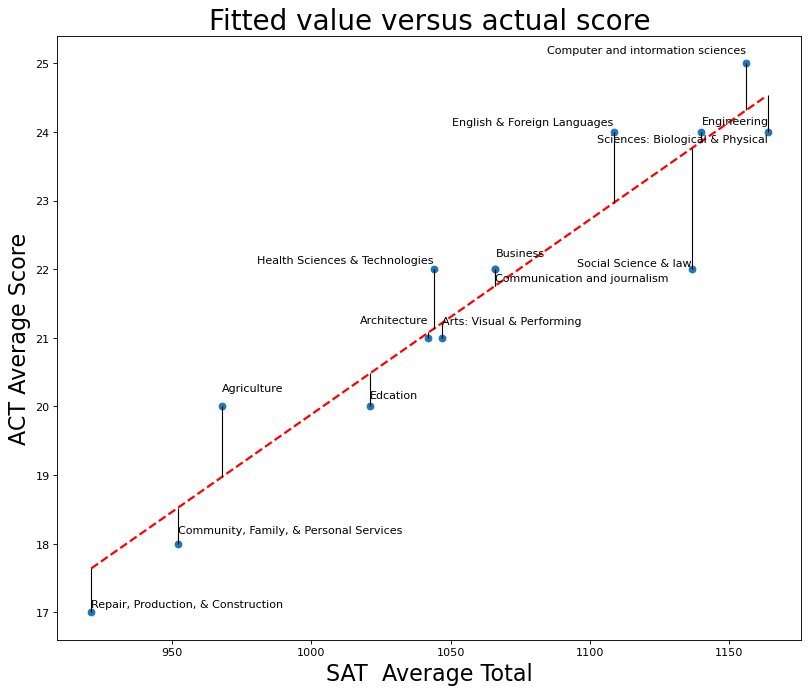

In [45]:
y_pred = a*x+b
plt.figure(figsize=(12, 10), dpi=80)

plt.plot(x,y,'o')
plt.plot(x_line, y_line, '--', color='red',linewidth=2)

plt.vlines(x,y,y_pred,color='black',linewidth=1)


annotations= major['Degree-level goal and intended college major']
x_copy=x.copy(deep=True)
y_copy=y.copy(deep=True)

annotate(x_copy, y_copy, annotations)

plt.title("Fitted value versus actual score" ,fontsize= 25)
plt.xlabel("SAT  Average Total" ,fontsize= 20)
plt.ylabel("ACT Average Score", fontsize= 20)

plt.show()

In [46]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit() 
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Avg ACT Composite Score   R-squared:                       0.887
Model:                                 OLS   Adj. R-squared:                  0.878
Method:                      Least Squares   F-statistic:                     94.42
Date:                     Wed, 28 Sep 2022   Prob (F-statistic):           4.88e-07
Time:                             00:55:30   Log-Likelihood:                -15.797
No. Observations:                       14   AIC:                             35.59
Df Residuals:                           12   BIC:                             36.87
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


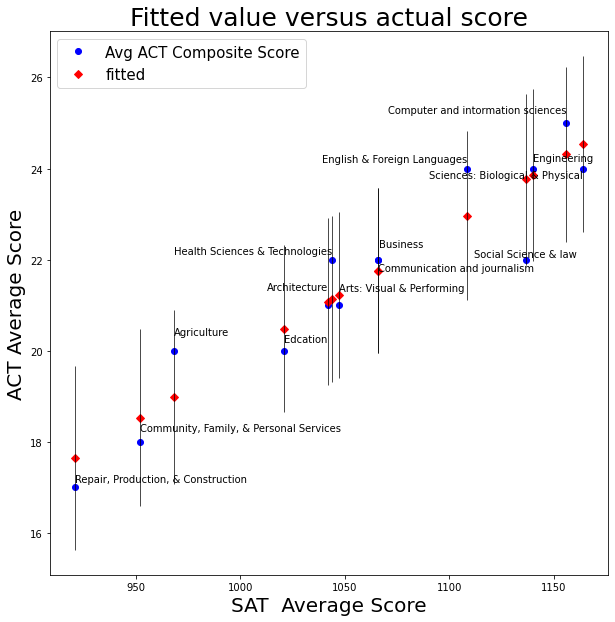

In [47]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(est2, 1, ax=ax)
fig.set_figheight(10)
fig.set_figwidth(10)


annotations= major['Degree-level goal and intended college major']

x_copy=x.copy(deep=True)
y_copy=y.copy(deep=True)

annotate(x_copy, y_copy, annotations)

plt.title("Fitted value versus actual score" ,fontsize= 25)
plt.xlabel("SAT  Average Score" ,fontsize= 20)
plt.ylabel("ACT Average Score", fontsize= 20)
plt.legend(loc="upper left", fontsize= 15)

Text(60.777777777777786, 0.5, 'Residuals')

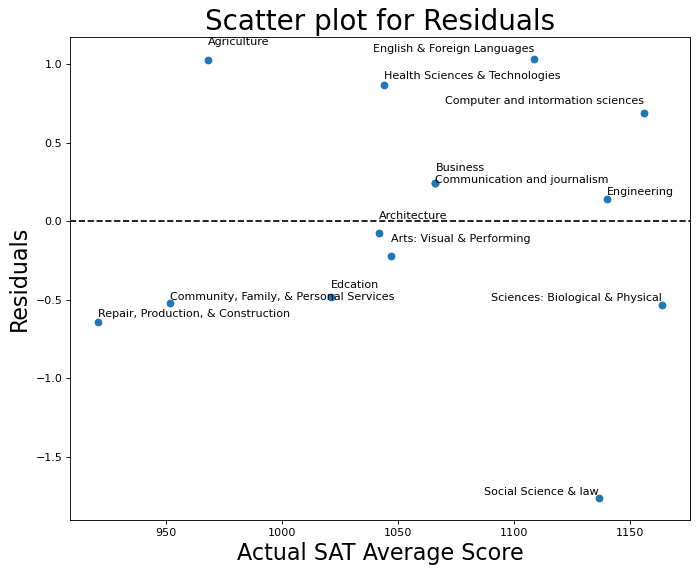

In [48]:
resids = y-y_pred
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(x, resids)
plt.axhline(y=0, color='black', linestyle='--')

annotations= major['Degree-level goal and intended college major']
x_copy=x.copy(deep=True)
resids_copy=resids.copy(deep=True)
annotate(x_copy, resids_copy, annotations)

plt.title("Scatter plot for Residuals" ,fontsize= 25)
plt.xlabel('Actual SAT Average Score', fontsize= 20)
plt.ylabel('Residuals', fontsize= 20) 

Text(0, 0.5, 'Count of data points')

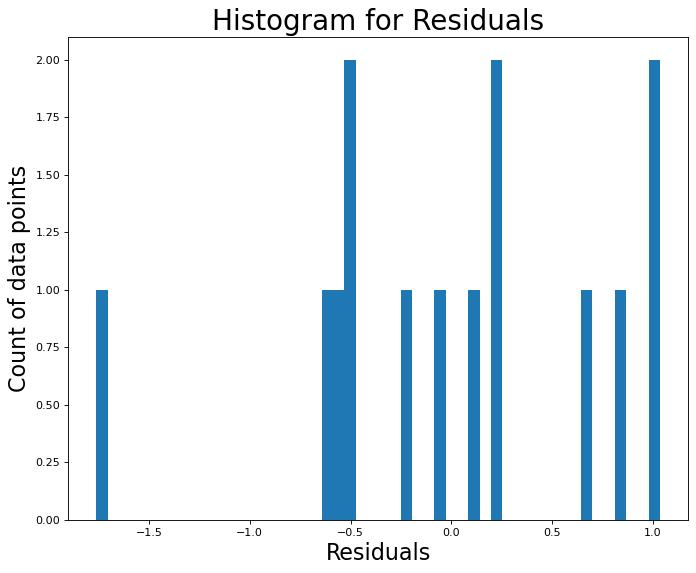

In [49]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist (resids, bins=50)
plt.title("Histogram for Residuals" ,fontsize= 25)
plt.xlabel('Residuals', fontsize= 20)
plt.ylabel('Count of data points', fontsize= 20) 

In [50]:
stud_res = est2.outlier_test()
df_stud_res= pd.DataFrame(stud_res, columns = ['student_resid','unadj_p','bonf(p)'])
df_stud_res

,student_resid,unadj_p,bonf(p)
0,1.467482,0.170247,1.0000
1,-0.094905,0.926097,1.0000
2,-0.270527,0.791764,1.0000
3,0.298274,0.771053,1.0000
4,0.298274,0.771053,1.0000
5,-0.716408,0.488670,1.0000
6,0.940360,0.367225,1.0000
7,-0.607293,0.555985,1.0000
8,0.180691,0.859896,1.0000
9,1.406154,0.187293,1.0000


Text(71.40277777777779, 0.5, 'Studentized Residuals')

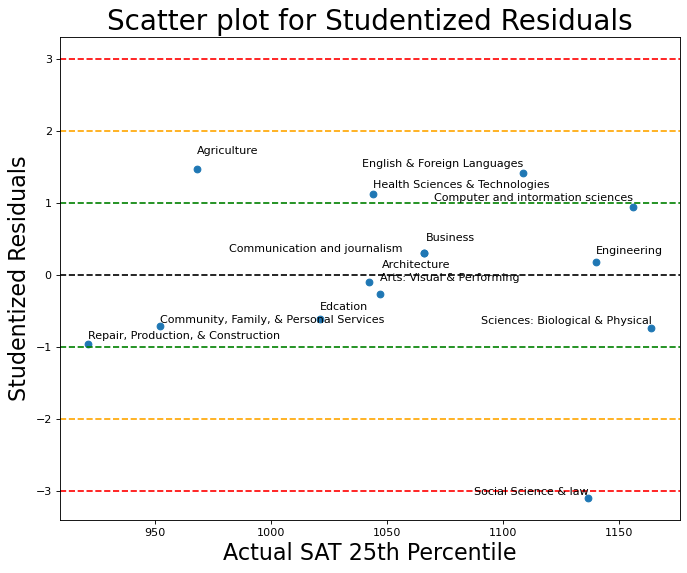

In [51]:
student_resid = df_stud_res.iloc[:,0]

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(x, student_resid)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='orange', linestyle='--')
plt.axhline(y=-2, color='orange', linestyle='--')
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.axhline(y=1, color='green', linestyle='--')
plt.axhline(y=-1, color='green', linestyle='--')

annotate(x,student_resid,annotations)

plt.title("Scatter plot for Studentized Residuals" ,fontsize= 25)
plt.xlabel('Actual SAT 25th Percentile', fontsize= 20)
plt.ylabel('Studentized Residuals', fontsize= 20) 

Text(0, 0.5, 'Count of data points')

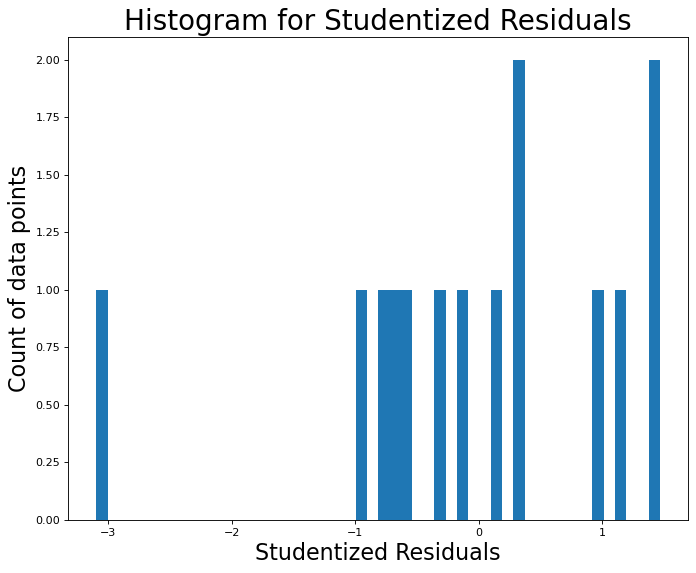

In [52]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(student_resid, bins=50)
plt.title("Histogram for Studentized Residuals" ,fontsize= 25)
plt.xlabel('Studentized Residuals', fontsize= 20)
plt.ylabel('Count of data points', fontsize= 20) 

In [53]:
major = pd.concat([major, student_resid], axis=1)
major.sort_values('student_resid',ascending=True)

,Degree-level goal and intended college major,Total SAT,Avg ACT Composite Score,student_resid
13,Social Science & law,1136.50,22,-3.095100
11,"Repair, Production, & Construction",921.00,17,-0.960087
12,Sciences: Biological & Physical,1163.75,24,-0.732117
5,"Community, Family, & Personal Services",952.00,18,-0.716408
7,Edcation,1021.00,20,-0.607293
2,Arts: Visual & Performing,1047.00,21,-0.270527
1,Architecture,1042.00,21,-0.094905
8,Engineering,1140.00,24,0.180691
3,Business,1066.00,22,0.298274
4,Communication and journalism,1066.00,22,0.298274


In [54]:
df = major.loc[ (major['student_resid'] <= -3) | (major['student_resid'] >= 3) ]
df

,Degree-level goal and intended college major,Total SAT,Avg ACT Composite Score,student_resid
13,Social Science & law,1136.5,22,-3.0951


## Result

In [55]:
intended_majors = df.iloc[:,:1]

print(f'Students who intend to take major in {intended_majors.iloc[0].item()} are recommanded to take SAT')

Students who intend to take major in Social Science & law are recommanded to take SAT
